# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing data

In [3]:
data = pd.read_csv('drive/MyDrive/CC_new/customer_churn_large_dataset-_1_.csv')

In [18]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [12]:
data.head(1000).Churn.value_counts()

1    519
0    481
Name: Churn, dtype: int64

In [11]:
data.tail(1000).Churn.value_counts()

1    521
0    479
Name: Churn, dtype: int64

In [13]:
data.shape

(100000, 9)

In [14]:
data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [16]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [17]:
data.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

In [19]:
data.isnull()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [20]:
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [21]:
data.groupby('Churn').size()

Churn
0    50221
1    49779
dtype: int64

# Exploratory Data Analysis (EDA)

In [22]:
outcome = 'Churn'

In [23]:
data.Age.unique()

array([63, 62, 24, 36, 46, 67, 30, 20, 53, 50, 44, 34, 28, 42, 55, 43, 31,
       41, 58, 64, 70, 18, 25, 27, 66, 29, 60, 26, 45, 19, 37, 49, 38, 57,
       47, 48, 40, 21, 33, 51, 35, 69, 61, 52, 39, 56, 59, 65, 22, 54, 68,
       32, 23])

In [24]:
data.Age.value_counts()

33    2046
50    1996
38    1970
63    1942
57    1942
19    1941
41    1939
42    1930
51    1929
59    1928
27    1924
66    1922
70    1921
44    1916
69    1912
61    1909
60    1904
31    1901
55    1900
21    1897
54    1896
53    1895
48    1895
39    1891
23    1887
20    1886
29    1885
28    1881
24    1876
58    1876
40    1875
30    1875
26    1874
56    1872
25    1871
37    1870
62    1867
46    1865
68    1863
43    1863
36    1859
49    1854
64    1848
47    1847
35    1845
18    1839
65    1833
45    1827
52    1824
32    1810
67    1798
34    1797
22    1787
Name: Age, dtype: int64

<Axes: xlabel='Age', ylabel='count'>

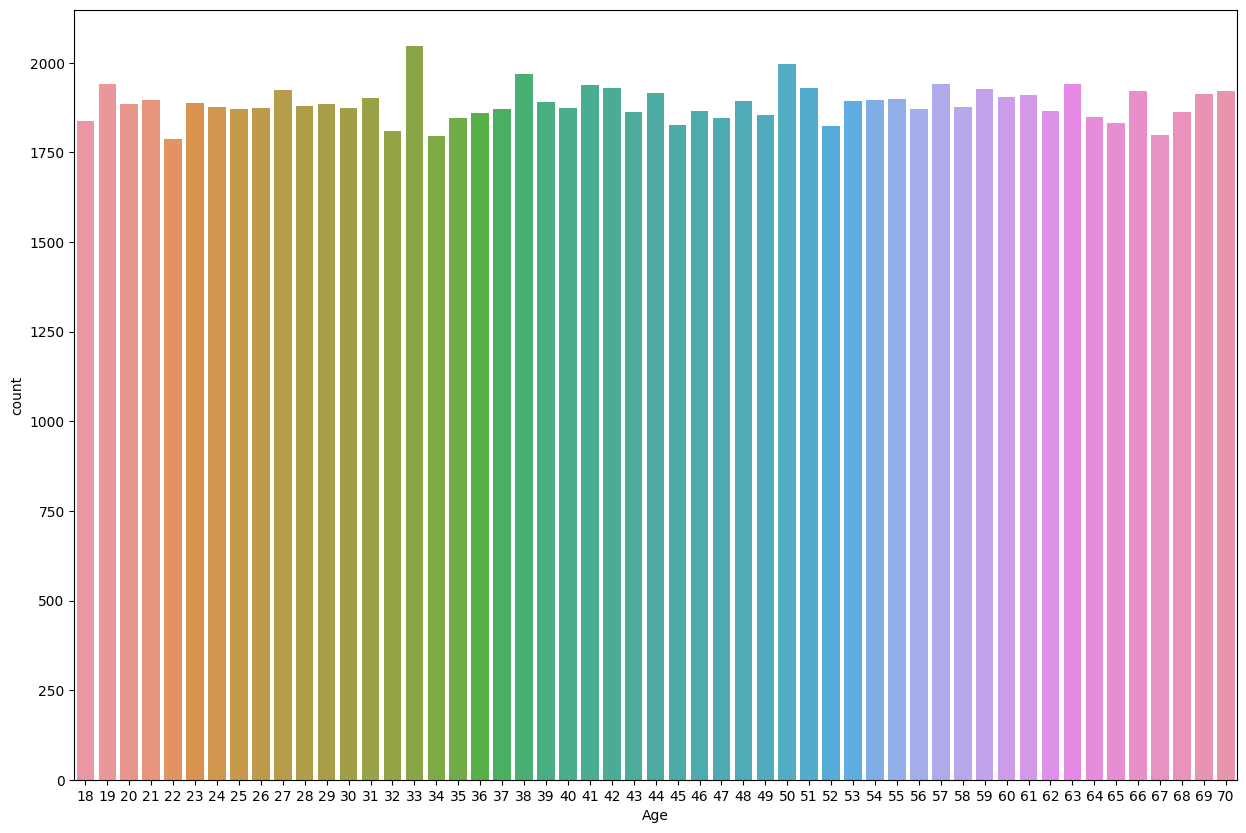

In [25]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.countplot(x='Age', data=data)


In [26]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [27]:
data.Subscription_Length_Months.unique()

array([17,  1,  5,  3, 19, 15, 10, 12, 20, 13,  8, 23,  2,  4, 18,  9, 14,
       16,  6,  7, 24, 22, 11, 21])

<Axes: xlabel='Subscription_Length_Months', ylabel='count'>

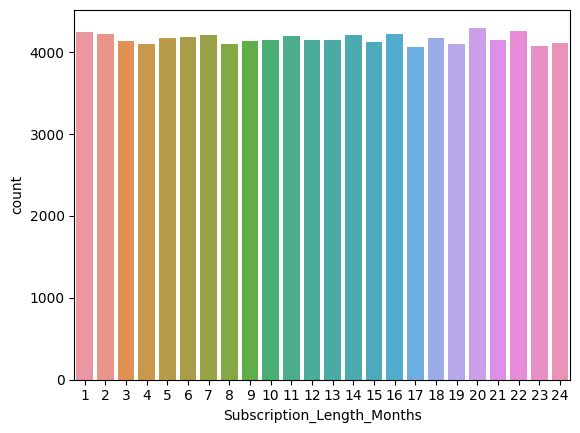

In [28]:
sns.countplot( x = 'Subscription_Length_Months', data = data)

In [29]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [30]:
data.Gender.value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

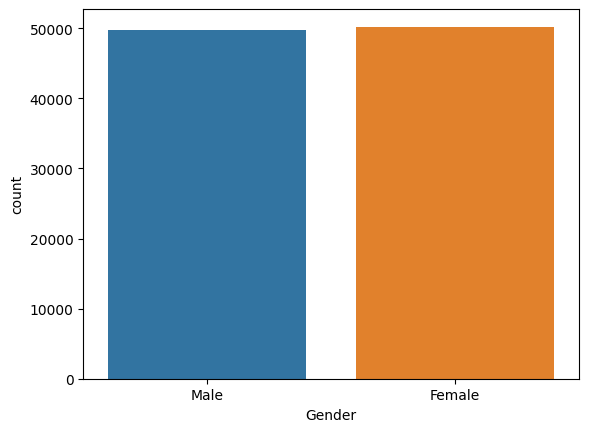

In [31]:
sns.countplot( x = 'Gender', data = data)

<Axes: xlabel='Location', ylabel='count'>

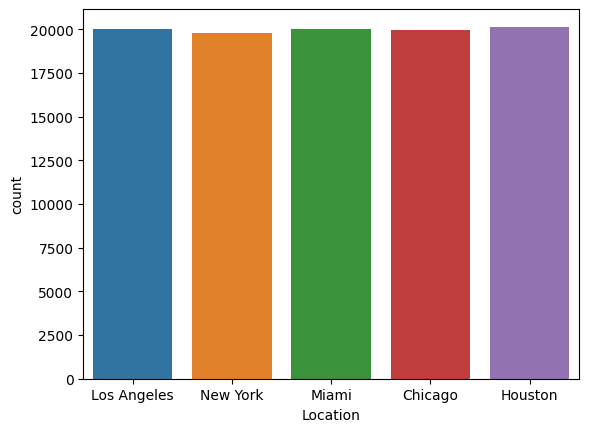

In [32]:
sns.countplot( x = 'Location', data = data)

In [33]:
data.Location.value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

<Axes: xlabel='Monthly_Bill', ylabel='count'>

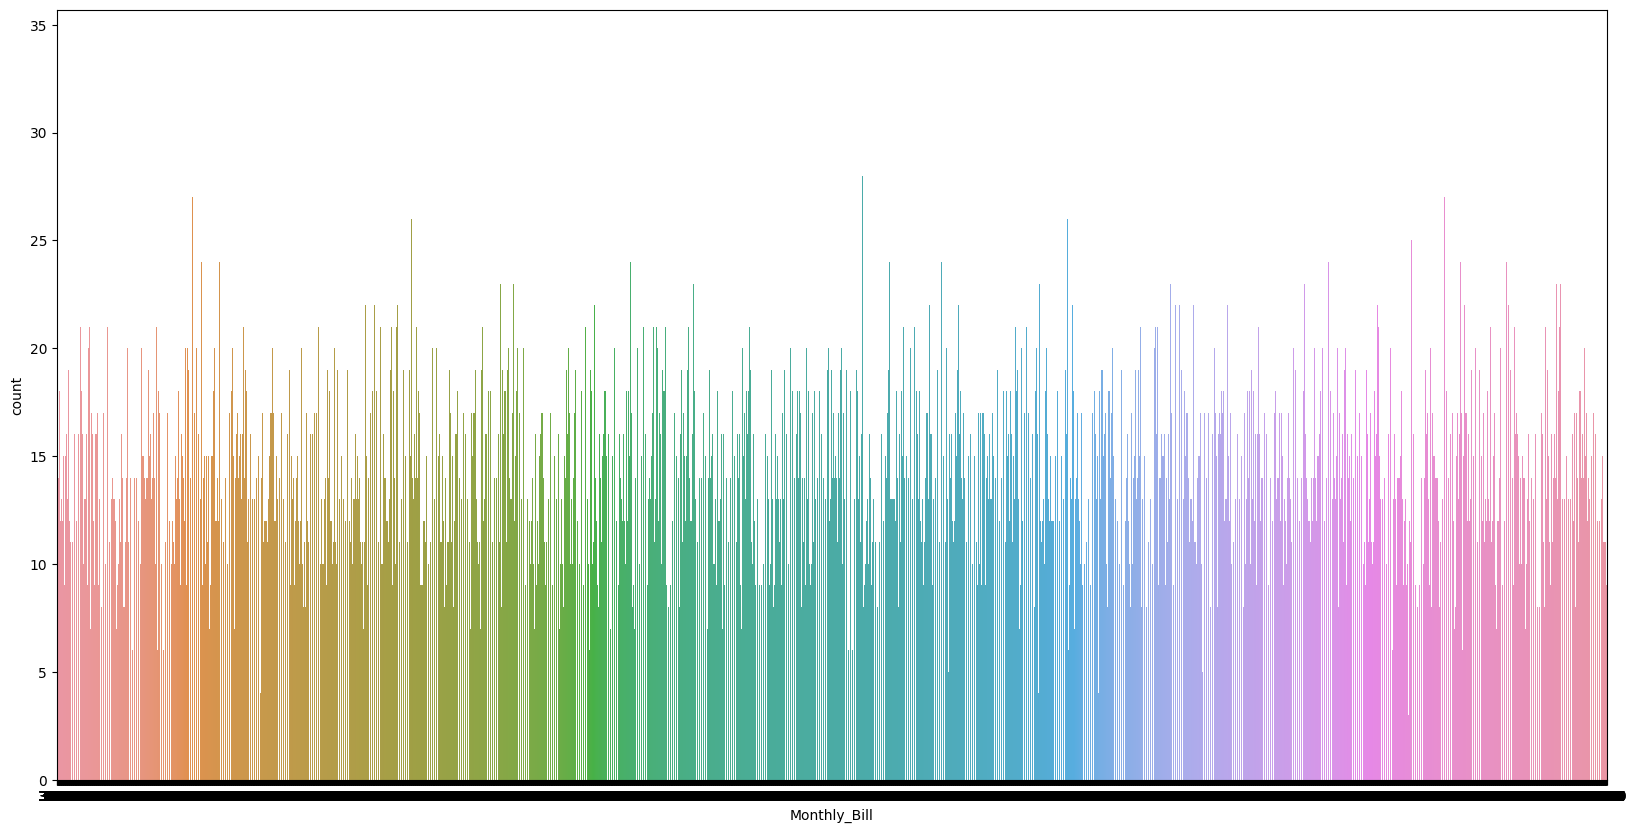

In [34]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot( x = 'Monthly_Bill', data = data)

In [35]:
data.Monthly_Bill.value_counts()

84.37     34
61.99     29
38.26     28
66.38     28
56.17     28
          ..
77.04      4
91.04      3
64.01      3
36.55      3
100.00     3
Name: Monthly_Bill, Length: 7001, dtype: int64

In [36]:
data.Churn.value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [37]:
data.groupby([outcome, 'Location']).size()

Churn  Location   
0      Chicago        10013
       Houston        10258
       Los Angeles    10161
       Miami           9955
       New York        9834
1      Chicago         9945
       Houston         9899
       Los Angeles     9880
       Miami          10076
       New York        9979
dtype: int64

<BarContainer object of 100000 artists>

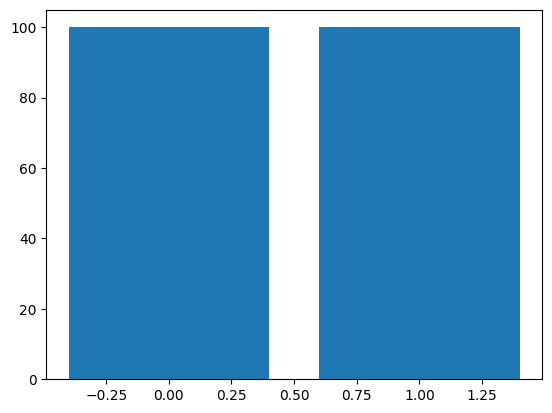

In [38]:
plt.bar(data.Churn,data.Monthly_Bill)

In [39]:
data['Monthly_Bill'].describe()

count    100000.000000
mean         65.053197
std          20.230696
min          30.000000
25%          47.540000
50%          65.010000
75%          82.640000
max         100.000000
Name: Monthly_Bill, dtype: float64

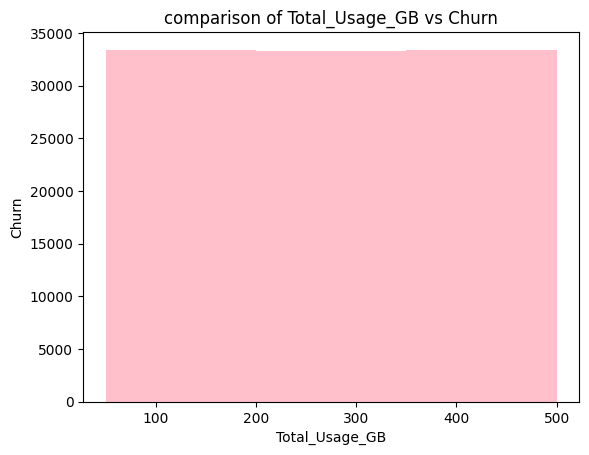

In [40]:
plt.hist(x = data.Total_Usage_GB, bins = 3, color = 'pink')
plt.title('comparison of Total_Usage_GB vs Churn')
plt.xlabel('Total_Usage_GB')
plt.ylabel('Churn')
plt.show()

In [41]:
data.groupby([outcome, 'Total_Usage_GB']).size()

Churn  Total_Usage_GB
0      50                132
       51                106
       52                104
       53                100
       54                104
                        ... 
1      496               104
       497               107
       498               102
       499               120
       500               106
Length: 902, dtype: int64

<Axes: xlabel='Total_Usage_GB', ylabel='count'>

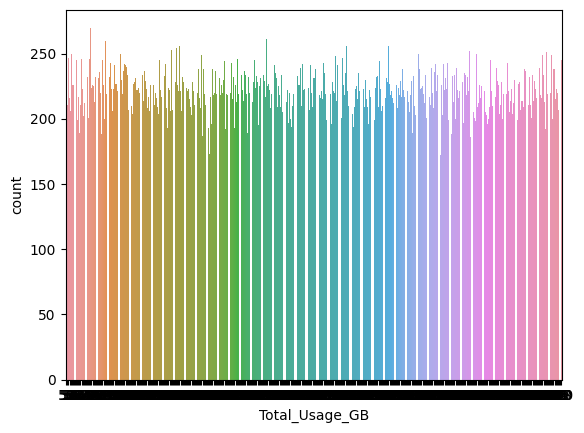

In [42]:
sns.countplot( x = 'Total_Usage_GB', data = data)

In [43]:
data.groupby([outcome, 'Gender']).size()

Churn  Gender
0      Female    25272
       Male      24949
1      Female    24944
       Male      24835
dtype: int64

In [44]:
data.groupby([outcome, 'Location']).size()

Churn  Location   
0      Chicago        10013
       Houston        10258
       Los Angeles    10161
       Miami           9955
       New York        9834
1      Chicago         9945
       Houston         9899
       Los Angeles     9880
       Miami          10076
       New York        9979
dtype: int64

In [45]:
data.groupby([outcome, 'Age']).size()

Churn  Age
0      18      900
       19     1008
       20      953
       21      968
       22      917
              ... 
1      66      988
       67      906
       68      938
       69      964
       70      942
Length: 106, dtype: int64



# Data Preprocessing

In [46]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [47]:
# Removing the unnecessary features from the dataset

data = data.drop(['CustomerID', 'Name'], axis = 1)



print(data.columns)

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')


In [48]:
#Using z scores, we remove outliers for variables have zscores > 3

from scipy.stats import zscore

In [49]:
data.Churn.value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [50]:
data[np.abs(zscore(data['Total_Usage_GB'])) < 3][outcome].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [51]:
data[np.abs(zscore(data['Monthly_Bill'])) < 3][outcome].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [52]:
data[np.abs(zscore(data['Subscription_Length_Months'])) < 3][outcome].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [53]:
data[np.abs(zscore(data['Age'])) < 3][outcome].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

Note: No outliers were detected in any variables above so none were removed

<ipython-input-54-c64484b5c189>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1)


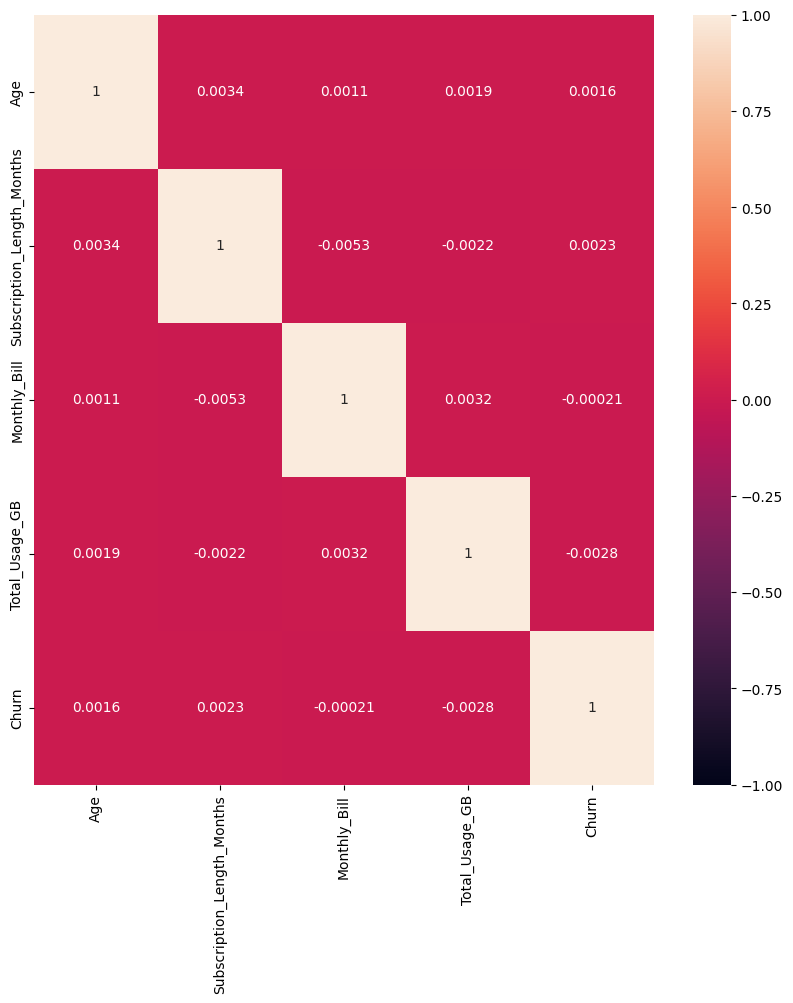

In [54]:
# checking for multi-collinearity in the dataset
plt.figure(figsize=[10, 10])

sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1)
plt.show()

In [55]:
data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


## Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [57]:
# splitting the dataset into x(independent variables) and y(dependent variables)

x = data.iloc[:,0:6]
y = data.iloc[:,6]

print(x.shape)
print(y.shape)

print(x.columns)
#print(y)

(100000, 6)
(100000,)
Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB'],
      dtype='object')


In [58]:
labelencoder_X_2 = LabelEncoder()

In [59]:
x.iloc[:,3] = labelencoder_X_2.fit_transform(x.iloc[:,3])

In [60]:

x = pd.get_dummies(x)

x.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,16,73.36,236,0,1,0,0,1,0,0
1,62,0,48.76,172,1,0,0,0,0,0,1
2,24,4,85.47,460,1,0,0,0,1,0,0
3,36,2,97.94,297,1,0,0,0,0,1,0
4,46,18,58.14,266,1,0,0,0,0,1,0


## Splitting data intro training and testing data

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.25, random_state =0)

## Scaling

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc = StandardScaler()

In [65]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
import pandas as pd
print(X_train)

[[ 1.37311901  0.94092814 -1.3038204  ... -0.50068741 -0.50110392
  -0.49681043]
 [-0.45729609  1.37399717  1.23313206 ... -0.50068741 -0.50110392
   2.01284017]
 [-0.39192412 -1.22441705 -1.31419547 ... -0.50068741 -0.50110392
  -0.49681043]
 ...
 [ 0.9808872   1.37399717 -0.21196745 ... -0.50068741 -0.50110392
   2.01284017]
 [ 0.5886554   0.94092814 -1.35668387 ... -0.50068741  1.99559403
  -0.49681043]
 [ 0.39253949 -1.3687734  -1.50588731 ... -0.50068741  1.99559403
  -0.49681043]]


In [67]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10
0,1.373119,0.940928,-1.303820,0.718329,-1.003152,1.003152,2.002921,-0.502124,-0.500687,-0.501104,-0.49681
1,-0.457296,1.373997,1.233132,-0.208381,0.996858,-0.996858,-0.499271,-0.502124,-0.500687,-0.501104,2.01284
2,-0.391924,-1.224417,-1.314195,-1.418464,0.996858,-0.996858,2.002921,-0.502124,-0.500687,-0.501104,-0.49681
3,-1.633992,-0.358279,0.210446,-0.246675,-1.003152,1.003152,-0.499271,-0.502124,1.997254,-0.501104,-0.49681
4,1.438491,-0.358279,-1.597781,-0.583660,0.996858,-0.996858,2.002921,-0.502124,-0.500687,-0.501104,-0.49681
...,...,...,...,...,...,...,...,...,...,...,...
74995,0.850143,-1.080061,-1.625448,0.266462,0.996858,-0.996858,2.002921,-0.502124,-0.500687,-0.501104,-0.49681
74996,1.307747,-0.646992,-0.508398,-0.453461,-1.003152,1.003152,-0.499271,-0.502124,-0.500687,1.995594,-0.49681
74997,0.980887,1.373997,-0.211967,-1.449099,0.996858,-0.996858,-0.499271,-0.502124,-0.500687,-0.501104,2.01284
74998,0.588655,0.940928,-1.356684,0.419637,-1.003152,1.003152,-0.499271,-0.502124,-0.500687,1.995594,-0.49681


#Model Training and Testing

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
model = RandomForestClassifier()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, Y_train))
print("Testing Accuracy :", model.score(X_test, Y_test))

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Training Accuracy : 1.0
Testing Accuracy : 0.49416
[[6560 6042]
 [6604 5794]]


In [69]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = X_train, y= Y_train, cv = 10)
print(cvs)

[0.4948     0.5056     0.49026667 0.5028     0.4852     0.4868
 0.51226667 0.49386667 0.4936     0.50386667]


In [70]:
print("Mean Accuracy :", cvs.mean())
print("Variance :", cvs.std())

Mean Accuracy : 0.49690666666666666
Variance : 0.008381948858509377


In [77]:
from sklearn.metrics import f1_score, classification_report
pred1 = model.predict(X_train)
pred2 = model.predict(X_test)

print(f1_score(Y_train, pred1))
print(f1_score(Y_test, pred2))

print(classification_report(Y_train, pred1))
print(classification_report(Y_test, pred2))

1.0
0.4781711644796567
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37619
           1       1.00      1.00      1.00     37381

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000

              precision    recall  f1-score   support

           0       0.50      0.52      0.51     12602
           1       0.49      0.47      0.48     12398

    accuracy                           0.49     25000
   macro avg       0.49      0.49      0.49     25000
weighted avg       0.49      0.49      0.49     25000



In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, Y_train))
print("Testing Accuaracy :", model.score(X_test, Y_test))

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Training Accuracy : 1.0
Testing Accuaracy : 0.49916
[[6331 6271]
 [6250 6148]]


In [79]:
from sklearn.metrics import f1_score, classification_report
pred1 = model.predict(X_train)
pred2 = model.predict(X_test)

print(f1_score(Y_train, pred1))
print(f1_score(Y_test, pred2))

print(classification_report(Y_train, pred1))
print(classification_report(Y_test, pred2))

1.0
0.4954668171011806
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37619
           1       1.00      1.00      1.00     37381

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     12602
           1       0.50      0.50      0.50     12398

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



In [72]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, Y_train))
print("Testing Accuracy :", model.score(X_test, Y_test))

cm = confusion_matrix(Y_test, Y_pred)
print(cm)


Training Accuracy : 0.5066533333333333
Testing Accuracy : 0.49976
[[7102 5500]
 [7006 5392]]


In [74]:
from sklearn.metrics import f1_score, classification_report
pred1 = model.predict(X_train)
pred2 = model.predict(X_test)

print(f1_score(Y_train, pred1))
print(f1_score(Y_test, pred2))

print(classification_report(Y_train, pred1))
print(classification_report(Y_test, pred2))

0.4755048698217076
0.45582854155776265
              precision    recall  f1-score   support

           0       0.52      0.61      0.56     37619
           1       0.52      0.44      0.48     37381

    accuracy                           0.52     75000
   macro avg       0.52      0.52      0.52     75000
weighted avg       0.52      0.52      0.52     75000

              precision    recall  f1-score   support

           0       0.50      0.58      0.54     12602
           1       0.50      0.42      0.46     12398

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.50     25000
weighted avg       0.50      0.50      0.50     25000



In [80]:
import tensorflow as tf

tf.random.set_seed(42)

# Create a Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [82]:
num_epochs = 5

# Fit the model to the training data
history = model.fit(
    X_train,
    Y_train,
    epochs=num_epochs,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.6946 - accuracy: 0.4999 - precision: 0.4980 - recall: 0.4164 - val_loss: 0.7019 - val_accuracy: 0.4983 - val_precision: 0.4983 - val_recall: 1.0000
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6935 - accuracy: 0.5015 - precision: 0.4999 - recall: 0.4278 - val_loss: 0.6932 - val_accuracy: 0.4983 - val_precision: 0.4983 - val_recall: 1.0000
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6945 - accuracy: 0.4943 - precision: 0.4917 - recall: 0.4310 - val_loss: 0.6935 - val_accuracy: 0.4983 - val_precision: 0.4983 - val_recall: 0.9999
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6933 - accuracy: 0.4990 - precision: 0.4970 - recall: 0.4210 - val_loss: 0.6933 - val_accuracy: 0.5017 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6934 - accur

In [83]:
evaluation = model.evaluate(X_test, Y_test)

print(f"Loss: {evaluation[0]:.2f}")
print(f"Accuracy: {evaluation[1] * 100:.2f}%")
print(f"Precision: {evaluation[2] * 100:.2f}%")
print(f"Recall: {evaluation[3] * 100:.2f}%")

782/782 [==============================] - 2s 2ms/step - loss: 0.6931 - accuracy: 0.5041 - precision: 0.0000e+00 - recall: 0.0000e+00
Loss: 0.69
Accuracy: 50.41%
Precision: 0.00%
Recall: 0.00%


Note below is the code for training model on SVC classifier. However, due to time constraints for the assignment SVC was not evaluated.

The metrics, however, will probably be similar, this is due to the inability of the models to find a suitable underlying pattern present in the data

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, Y_train))
print("Testing Accuracy :", model.score(X_test, Y_test))

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

#Conclusion
The metrics indicate no significant correlation between the independent variables and the churn variable (also see: heatmap)
This could also be because:
(A) The models are underfitting/ overfitting
OR
(B) There is no significant underlying trend present in the data itself

# Final Result: Out of the above models evaluated, The Logistic Regression model should be chosen as it has better values for precision recall, f1- score and accuracy